# CCA
[source](https://www.youtube.com/watch?v=aUnNWZorGmk&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=35) <br><br> 

CCA (Complete Case Analysis) also called "line-wise deletion" of cases, consists discarding of the observations where values in any of the variables are missing   

Complete Case analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.  


### Assumption:  
Data is missing completly at random (MCAR)  
Meaning there is no order of missing values, if there were an order it would be like after every 5 rows there is a missing value... or first 10 rown have missing values... its not like that... the data is missing completely at random.

### CODE

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('assets/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
df.shape

(19158, 13)

In [14]:
df['experience'].isnull().mean()

np.float64(0.0033928385008873576)

In [15]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0.0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [19]:
df.dropna(subset=cols).isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.541031
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.530555
experience                 0.000000
company_size              29.786986
company_type              30.799674
training_hours             0.000000
target                     0.000000
dtype: float64

In [21]:
(len(df.dropna(subset=cols)) / len(df) )*100 # this is the remaining percentage data after removal

89.68577095730244

In [22]:
new_df = df.dropna(subset=cols)
new_df.shape,df.shape

((17182, 13), (19158, 13))

<function matplotlib.pyplot.show(close=None, block=None)>

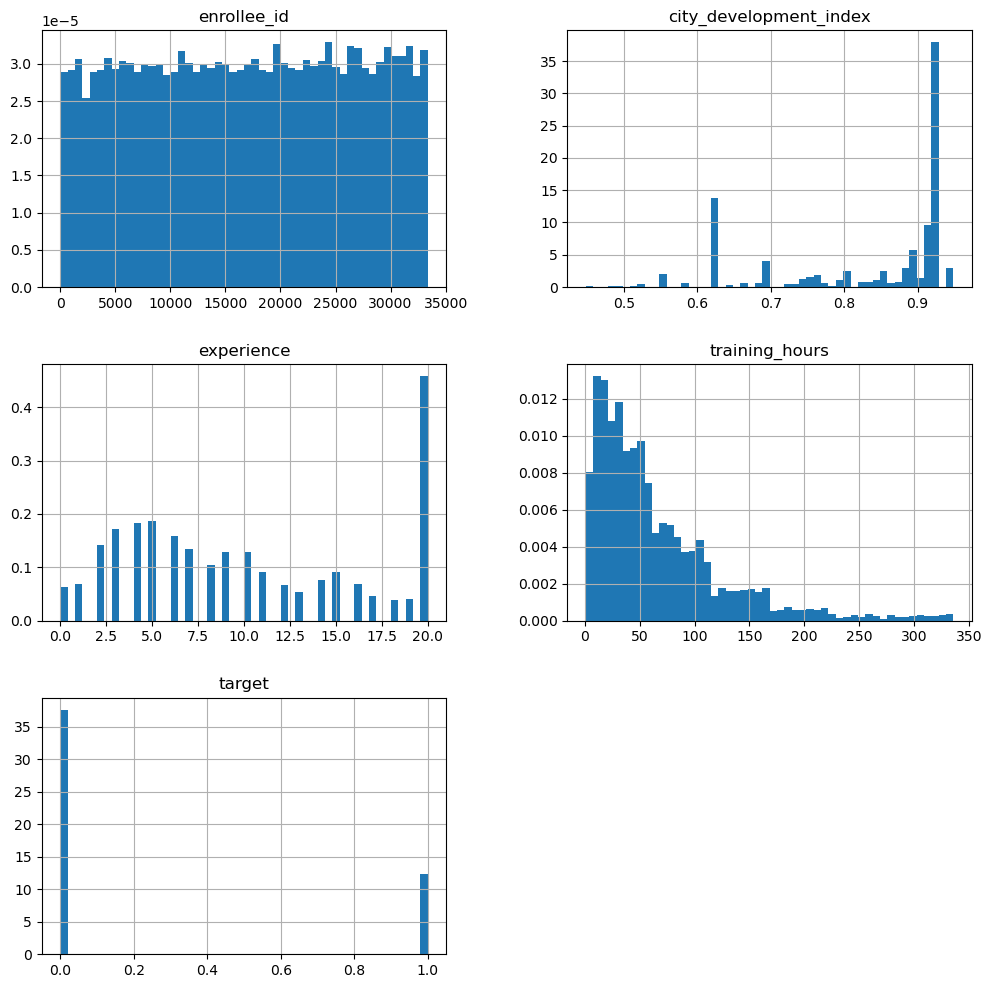

In [24]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show

In [28]:
# for categories we have to make sure that after dropping the ratio of any category's appearances remains same. like if it had appeared 70% times before removal it should be around that after removal as wel.
temp = pd.concat([
df['enrolled_university'].value_counts() / len(df),
new_df['enrolled_university'].value_counts() / len(new_df) 
], axis=1
)

temp.columns = ['original','CCA']
temp

,original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [31]:
# same for education level
temp = pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


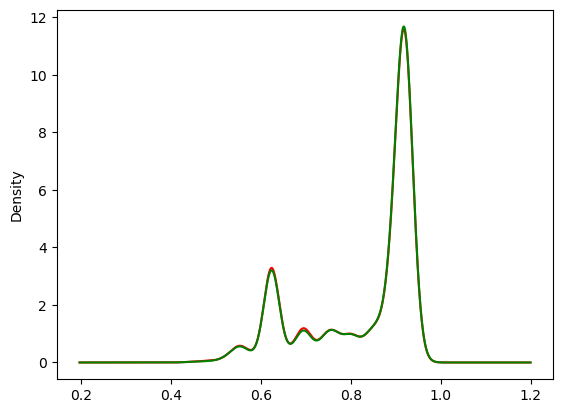

In [34]:
# to check the numeric kind we can plot either histogram or or density graph of both in same axes with different colours.
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

plt.show()

# if both colors are overriding at most of the places its fine, a little appearance of both can be tolerated but if both lines go separate ways thats bad

when your model is on the server you cant do CCA like this, and having nulls there is problemetic because the model doesn't know how to deal with nulls, thats why it's not production friendly to do CCA, rather people prefer Imputation over it.